<a href="https://colab.research.google.com/github/leticiaram/Modelos_Estocasticos_2023/blob/main/Codigo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de Cadenas de Markov

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

## Caminata Aleatoria Simple

### Funciones

In [ ]:
def caminata_aleatoria(p, x0, pasos=1000):
  #X0 es la posición original
  trayectoria_simulada = []
  nueva_posicion=x0
  for i in range(1,pasos):
    if p == 0.5:
      paso = random.randrange(-1, 2, step = 1)
    else:
      rv = bernoulli.rvs(p)
      if rv == 1:
        paso = 1
      else:
        paso = -1
    nueva_posicion += paso
    trayectoria_simulada.append(nueva_posicion)
  return trayectoria_simulada



In [ ]:
def grafica_ca(sim):
  plt.plot(sim)
  a = min(sim)
  b = max(sim)
  rango = b-a
  plt.yticks(np.arange(a-round(0.1*rango), b+round(0.1*rango),round(0.1*rango)))
  plt.grid(linestyle = '--', linewidth = 0.3)
  plt.xlabel('N')
  plt.ylabel('Posicion')
  plt.title('Caminata Aleatoria');

### Ejemplos


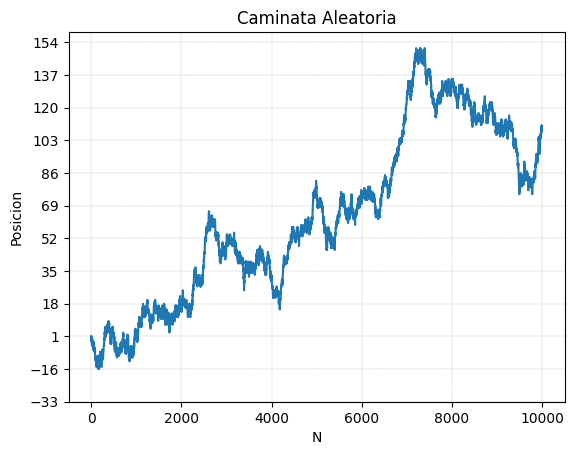

In [ ]:
random.seed(10)
sim = caminata_aleatoria(p=0.5, x0=0, pasos=10000)


grafica_ca(sim)


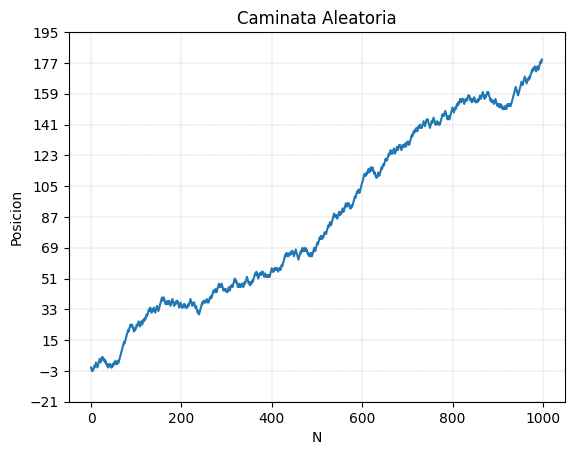

In [ ]:
random.seed(10)
sim = caminata_aleatoria(p=0.6, x0=0)

grafica_ca(sim)

## Ejemplo de viajes



Fuente: Robert P. Dobow. "Introduction to Stochastic Processes with R"


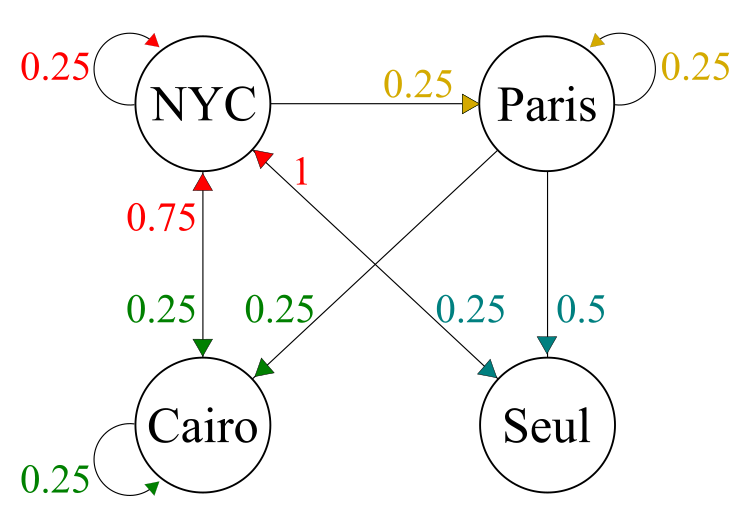

In [58]:
mat_trans = {'NYC': [.25,0,.75,1],
      'Paris': [.25,.25,0,0],
      'Cairo': [.25,.25,.25,0],
      'Seoul': [.25,.5,0,0]}

P_pd = pd.DataFrame(data = mat_trans, index = ['NYC', 'Paris', 'Cairo', 'Seoul'])

P_pd

,NYC,Paris,Cairo,Seoul
NYC,0.25,0.25,0.25,0.25
Paris,0.00,0.25,0.25,0.50
Cairo,0.75,0.00,0.25,0.00
Seoul,1.00,0.00,0.00,0.00


In [97]:
viajes_sim = []
viajes_sim.append(P_pd.iloc[0].index[0])        #Seleccionamos NYC como el lugar inicial
city = np.random.choice(P_pd.iloc[0].index, p = P_pd.iloc[0])  #seleccionamos la siguiente ciudad

print(viajes_sim,'\n')
print(P_pd.iloc[0],'\n')
print(city)

['NYC'] 

NYC      0.25
Paris    0.25
Cairo    0.25
Seoul    0.25
Name: NYC, dtype: float64 

Cairo


In [130]:
random.seed(100)
viajes_sim = []
viajes_sim.append(P_pd.iloc[0].index[0])        #Seleccionamos NYC como el lugar inicial
city = np.random.choice(P_pd.iloc[0].index, p = P_pd.iloc[0])  #seleccionamos la siguiente ciudad
viajes_sim.append(city)

while len(viajes_sim) < 100:
  city = np.random.choice(P_pd.iloc[P_pd.index.get_loc(city)].index, p = P_pd.iloc[P_pd.index.get_loc(city)])
  viajes_sim.append(city)


In [132]:
print(viajes_sim[0:10])

['NYC', 'Seoul', 'NYC', 'Cairo', 'NYC', 'NYC', 'NYC', 'Seoul', 'NYC', 'NYC']


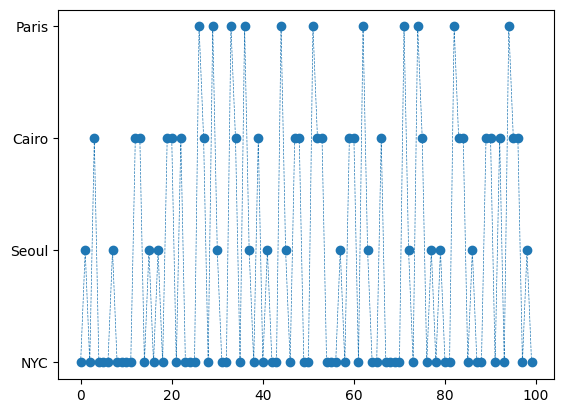

In [170]:
plt.plot(viajes_sim,'--o',linewidth = '0.5',alpha=1)

In [134]:
#type(viajes_sim)
viajes_sim_df = pd.DataFrame(viajes_sim)

conteo = viajes_sim_df.value_counts()
conteo


NYC      50
Cairo    24
Seoul    15
Paris    11
dtype: int64

In [135]:
conteo/sum(conteo)*100   #Frecuencia

NYC      50.0
Cairo    24.0
Seoul    15.0
Paris    11.0
dtype: float64

### Funciones

In [137]:
def potencia_matriz(matrix, power):
  if power == 0:
    return np.identity(len(matrix))
  elif power == 1:
    return matrix
  else:
    return np.dot(matrix, potencia_matriz(matrix, power-1))



In [138]:
def grafica_trayectoria(sim):
  plt.plot(sim)
  a = min(sim)
  b = max(sim)
  rango = b-a
  plt.yticks(np.arange(a-round(0.1*rango), b+round(0.1*rango),round(0.1*rango)))
  plt.grid(linestyle = '--', linewidth = 0.3)
  plt.xlabel('N')
  plt.ylabel('Posicion')
  plt.title('Caminata Aleatoria');

### Ejemplos

Transformamos la base de datos de panda a un arreglo de numpy

In [139]:
P = P_pd.to_numpy()
print(P)


[[0.25 0.25 0.25 0.25]
 [0.   0.25 0.25 0.5 ]
 [0.75 0.   0.25 0.  ]
 [1.   0.   0.   0.  ]]


In [140]:
potencia_matriz(matrix = P, power = 2)

array([[0.5   , 0.125 , 0.1875, 0.1875],
       [0.6875, 0.0625, 0.125 , 0.125 ],
       [0.375 , 0.1875, 0.25  , 0.1875],
       [0.25  , 0.25  , 0.25  , 0.25  ]])

In [142]:
potencia_matriz(matrix = P, power = 20)

array([[0.4556962 , 0.15189873, 0.20253165, 0.18987342],
       [0.4556962 , 0.15189873, 0.20253165, 0.18987342],
       [0.4556962 , 0.15189873, 0.20253165, 0.18987342],
       [0.4556962 , 0.15189873, 0.20253165, 0.18987342]])

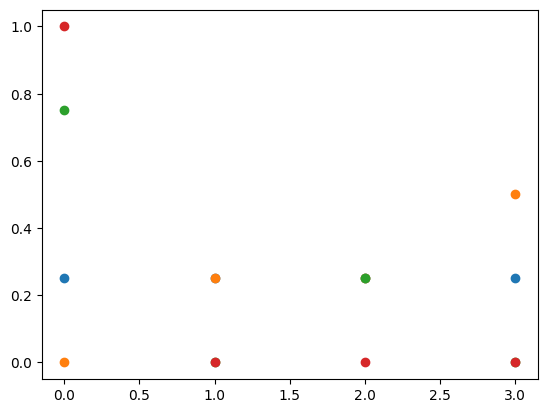

In [154]:
plt.plot(P.transpose(),'o', alpha=1)
plt.show()

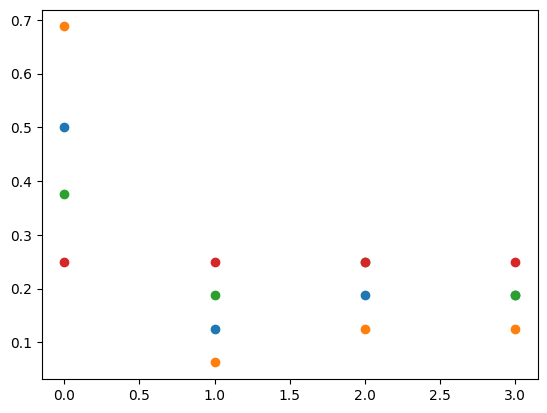

In [181]:
plt.plot(potencia_matriz(matrix = P, power = 2).transpose(),'o', alpha=1)
plt.show()